<a href="https://colab.research.google.com/github/Rajadurai-CSE/Indian-Market-Electric-Scooters-Sentiment-Analysis/blob/main/Sentiment_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial; max-width:900px; margin:18px auto; line-height:1.55; color:#0f172a;">
  <header style="padding:16px 20px; border-radius:12px; box-shadow:0 6px 18px rgba(15,23,42,0.06); background:linear-gradient(90deg,#f8fafc,#ffffff);">
    <h1 style="margin:0 0 6px; font-size:28px;">Electric Scooters — Sentiment Analysis</h1>
    <p style="margin:0; color:#334155;">A compact, practical notebook header to guide analysis of rider opinions for popular family-segment electric scooters.</p>
  </header>

  <section style="margin-top:18px; padding:14px; border-radius:10px; background:#ffffff; box-shadow:0 4px 10px rgba(2,6,23,0.03);">
    <h2 style="margin-top:0; font-size:20px;">Project Goal</h2>
    <p>Understand real-world feedback from owners of popular family electric scooters and extract actionable insights so manufacturers can prioritise product improvements and address frequent customer pain points.</p>
  </section>

  <section style="margin-top:16px; padding:14px; border-radius:10px; background:#ffffff;">
    <h2 style="font-size:20px; margin-top:0;">Scooter Models Analyzed</h2>
    <ul>
      <li><strong>TVS</strong> — TVS iQube</li>
      <li><strong>Ather</strong> — Ather Rizta</li>
      <li><strong>Ola</strong> — Ola S1X</li>
      <li><strong>Bajaj</strong> — Chetak</li>
    </ul>
  </section>

  <section style="margin-top:16px; padding:14px; border-radius:10px; background:#ffffff;">
    <h2 style="font-size:20px; margin-top:0;">Analysis Workflow</h2>
    <ol>
      <li><strong>Data Understanding</strong>
        <p style="margin:6px 0 0; color:#475569;">Explore the structure and quality of the review data: missing values, date formats.</p>
      </li>
      <li style="margin-top:8px;"><strong>Text Preprocessing</strong>
        <p style="margin:6px 0 0; color:#475569;">Clean and normalise text (lowercasing, removing noise, tokenisation, stopword removal, lemmatisation/stemming, handling emojis and negations).</p>
      </li>
      <li style="margin-top:8px;"><strong>Sentiment Analysis</strong>
        <p style="margin:6px 0 0; color:#475569;">Use model-based (fine-tuned transformer) methods, to get sentiments from the review.</p>
      </li>
      <li style="margin-top:8px;"><strong>Visualization</strong>
        <p style="margin:6px 0 0; color:#475569;">Visualizing most common words, customer pain points with the use of different visualization method.</p>
      </li>
      <li style="margin-top:8px;"><strong>Suggestions & Areas for Improvement</strong>
        <p style="margin:6px 0 0; color:#475569;">Convert frequent negative themes into prioritized recommendations for engineering, product, and customer support teams.</p>
      </li>
    </ol>
  </section>


</div>


<h4>TVS IQUBE</h4>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

#Custom dataset from web scrapping
df = pd.read_csv("tvs_iqube_final.csv")
df.drop_duplicates(inplace=True)
len(df)

318

In [ ]:
df.drop_duplicates(subset='review_text',inplace=True)

In [ ]:
df.head(3)

,dt,reviewer_id,review_text,overall_rating,range_reported
0,2021-09-30,1,"Hello,I purchased tvs iqube in march 2021, it ...",3.0,65 km/charge
1,2023-09-30,2,Battery problemsBattery average issuesHandle v...,1.0,75 km/charge
2,2022-09-30,3,"Never buy tvs electric bikes, noserviceafter s...",3.0,65 km/charge


In [ ]:
df = df.rename(columns={"review_text":"review"})

<h4>Exploratory Data Analysis</h4>

<p style="font-size:14px"> Let us first understand the overall rating column </p>

<Axes: xlabel='overall_rating', ylabel='Count'>

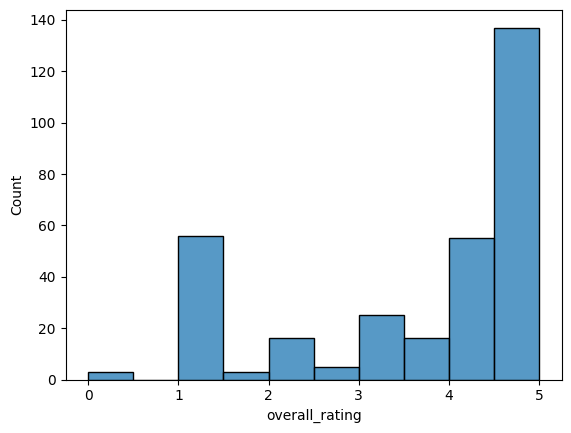

In [ ]:
import seaborn as sn
sn.histplot(data = df,x = 'overall_rating')

In [ ]:
df['overall_rating'].describe()

,overall_rating
count,316.000000
mean,3.596203
std,1.516068
min,0.000000
25%,2.500000
50%,4.200000
75%,5.000000
max,5.000000


<p style="font-size:14px"> At least 50% of users rate the model positively. However, there are also strong negative reviews with an overall rating less than or equal to 2. Before we dig deeper, let us first understand the data with an overall rating equal to 0. </p>

In [ ]:
df[df['overall_rating']==0]

,dt,reviewer_id,review,overall_rating,range_reported
5,2022-09-30,6,"Very poorservice, company claims75 kmone charg...",0.0,50 km/charge
50,2023-09-30,51,Very worstservicefrom seller and company they ...,0.0,70 km/charge
96,2024-12-09,97,I have a Scooter Pep Plus with which problem w...,0.0,122 km/charge


In [ ]:
pd.set_option('display.max_colwidth',None)
df.iloc[96][['review']]

,96
review,"I have a Scooter Pep Plus with which problem with apartnamed ECU which frequently gets issues and as a result, the vehicle gets missing issues while riding I complained many times regarding this to my home dealer Darshana Automobile TVS Alwar Rajasthan.This time also gave my vehicle forservicingbut after approx 10 days they were unable to find the actual problem behind this and suggest to change thepartwhile the customer already changed it two times within the range of approx5000 kilometersrunning only. So kindly look into the matter and provide a proper solution for the same. I hereby why attach the job card ofservicefor the same kindly resolve the problem ASAP .Thank you"


<p style="font-size:14px">The Third review located at index 96 is not even associated TVS Iqube. Let us drop the row. </p>

In [ ]:
df.drop(96,inplace=True)

In [ ]:
temp_df = df.copy()

In [ ]:
temp_df.dropna(subset='range_reported',inplace=True)
temp_df['range_reported_t']=temp_df['range_reported'].apply(lambda x: int(x.split(' ')[0]))

Text(0.5, 0, 'Range Reported')

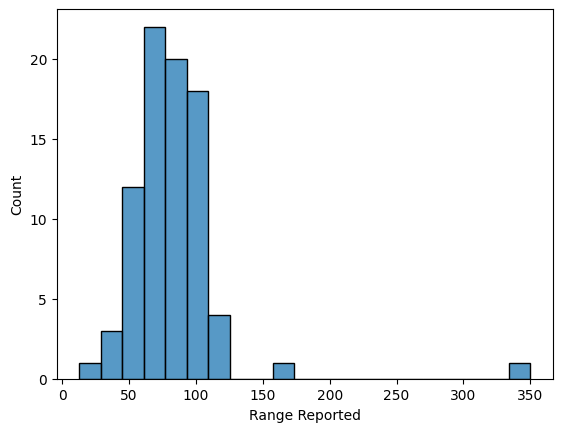

In [ ]:
import matplotlib.pyplot as plt
sn.histplot(data=temp_df,x='range_reported_t')


In [ ]:
temp_df['range_reported_t'].describe()

,range_reported_t
count,82.000000
mean,83.146341
std,37.956805
min,13.000000
25%,65.000000
50%,80.000000
75%,100.000000
max,350.000000


<Axes: xlabel='range_reported_t'>

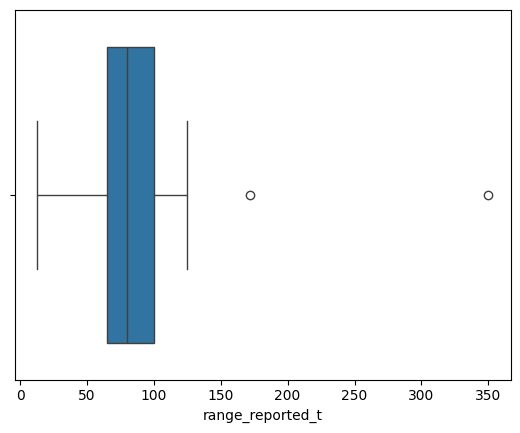

In [ ]:
sn.boxplot(data=temp_df,x='range_reported_t')

<p style="font-size:14px"> Let us check these data points to see if these reviews are genuine. </p>

In [ ]:
temp_df[temp_df['range_reported_t']>150]

,dt,reviewer_id,review,overall_rating,range_reported,range_reported_t
80,2024-10-07,81,"TVS Iqube rider experience is much better but no pickup to the straight break and the unique pickup is different for acc to battery levelThe tvs company claims the actual range75 kmon full charge but I used before 15 days the local range is so lessI use the eco mode locally and it gives around50 kmOne more important pointAccording to the range, the price is very high for other competitorsOne is a very good thing charging 0-80% on 2hoursBut take 2.5 hours",4.0,350 km/charge,350
86,2025-02-10,87,Scooty is best for Indian geography design is also good it looks like a regular scooter. This scooter is my first choice at the time of buying scooter because of my faith and trust on TVS. TVS is a renowned company in India and also exports to many other countries. The brand name was there so I purchased this scooter otherwise other companies scooters were getting fired and many issues were there andservicewas not available.,4.0,172 km/charge,172


We will drop the reviews that are not associated with TVS Iqube

In [ ]:
df.drop(86,inplace=True)

In [ ]:
pd.set_option('display.max_colwidth',50)
temp_df[temp_df['range_reported_t']<50].head(3)

,dt,reviewer_id,review,overall_rating,range_reported,range_reported_t
9,2023-09-30,10,"TVS iqube chargingservicesare not good, very w...",3.0,48 km/charge,48
37,2025-01-20,38,I bought this vehicle on 8.1.25 in Indore m.p....,1.0,13 km/charge,13
43,2025-06-23,44,"Mileage is worse by TVS IQUBE, and theservicei...",1.0,46 km/charge,46


We can ignore the range reported by these users and continue to analyze their reviews, as the reviews look genuine and the range reported may be mistyped.

In [ ]:
temp_df[(temp_df['range_reported_t']>50) & (temp_df['range_reported_t']<150)]['range_reported_t'].describe()

,range_reported_t
count,68.000000
mean,84.220588
std,16.323086
min,55.000000
25%,70.000000
50%,81.000000
75%,100.000000
max,125.000000


<p style="font-size:14px"> For the overall range, we have to consider different model variants under TVS iQube. The base variant has a claimed range of 94 km, so for the range reported to be less than 80, it can be associated with the base model, and for data with an overall range greater than 80, it can be associated with higher model variants. </p>


<p style="font-size:14px"> So on average for base models we can expect a range from 55 to 70; for higher models we can expect a range from 81 to 125. </p>

<h4> Next, lets us move on to the exciting part </h4>
<h4> Sentiment Analysis </h4>

<h4>Lets download the necessary libraries</h4>




In [ ]:
%pip install -q transformers sentencepiece torch


<div style="font-family: 'Segoe UI', Roboto, sans-serif; line-height:1.6; max-width:850px; margin:0 auto; padding:16px; background:#ffffff; border-radius:10px; box-shadow:0 4px 12px rgba(0,0,0,0.05);">
  
  <h2 style="margin-top:0; font-size:22px; color:#0f172a;">Sentiment Analysis — Preprocessing Note</h2>
  
  <p>
    Before performing detailed text preprocessing, we first apply a <strong>pre-trained sentiment analysis model</strong>.
    These models are robust enough to handle <em>stopwords</em> and other textual artifacts, so basic preprocessing steps
    (like removing stopwords or punctuation) are not strictly required at this stage.
  </p>
  
  <p>
    <strong>Model Used:</strong>
    <a href="https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment" target="_blank" style="color:#2563eb; text-decoration:none;">
      NLPTown BERT-base Multilingual Uncased Sentiment Model
    </a>
  </p>
  
  <p style="color:#475569; font-size:15px;">
    This model is specifically trained on <strong>product reviews</strong>, making it a suitable choice for analyzing
    customer feedback in our Electric Vehicle Sentiment Analysis project.
  </p>
  
  <p style="margin-bottom:0; font-size:14px; color:#64748b;">
    Text preprocessing tasks (like token cleaning, normalization, and handling special cases) will be addressed
    in the upcoming sections.
  </p>
</div>

In [ ]:
from transformers import pipeline

sent = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def hf_label(text):
    out = sent(text[:512])[0]
    return out['label'], out['score']

df[['hf_label', 'hf_score']] = df['review'].apply(lambda t: pd.Series(hf_label(t)))


In [ ]:
df[['review','hf_label','hf_score']].head(4)

,review,hf_label,hf_score
0,"Hello,I purchased tvs iqube in march 2021, it has run3000 kmfor 3 months and now there are many problems related to the speed, motor and several other problems. Full battery charging takes 6-7 hours, not satisfied by its performance, also still there are no properservicestations setup to solve the problems. Especially theservicestation at ramurthinagar, bangalore is very horrible. They don't even respond to our problems.",1 star,0.751629
1,"Battery problemsBattery average issuesHandle vibratingPoorservicesElectronics and hardware appliance problemsBad replyAfter purchasingThese all issues in tvs iqubeAfter sending it to the showroom on my transportation moneyThey do not properly repair scooty andNo, any issue solvedPlease tell me what I do.I want to complain and want to refund of my money and solve all issues.",1 star,0.509632
2,"Never buy tvs electric bikes, noserviceafter sales...I feel big cheated..This is not an original tvs group product. My bike is with theservicestation for more than 20 days... the extremely worst experience and never buy any one recommended.",1 star,0.944576
3,Performance is very poor on this bike. The charging problem is a very big thing. Worth money. Don't spend the money on this bike. My bike is standing in theservicecenter of tvs iqube for a long time. I am very disappointed. Nobody can hear me because I purchased this bike. I want to sell this bike as soon as possible.,1 star,0.639816


Alright we have got the hf_labels and hf_score.

From here on we will start analyzing the sentiments. But before that we will make sure that we only analyze data that we are very much confident about, we will set a threshold value based on which we will filter reviews that we are confident enough to do further analysis. For other reviews we will use the overall_rating column.

 Threshold:

 hf_score>threshold

 we will set a threshold above 0.5 (better than guessing)

Download the necessary packages

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


Text Preprocessing

In [ ]:
def pos_tagger(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


stop_words = set(stopwords.words("english"))
#Common words found which can affect our analysis by not letting us on focus on important words
custom_stopwords = {"tvs","best","good","worst","said","bad","one","even","iqube","also", "bike", "scooter", "ev","electric","vehicle","scooty","day","days","time","months","month","problem","company","hai","please","never","buy","dont","issue","issues","year","years"}
#For example : issue --> We want to focus on what issues the customers are facing.
              #good,bad --> What things are good and bad about this model?

lemmatizer = WordNetLemmatizer()

def preprocess_text(text,custom_stopwords):

    stop_words = set(stopwords.words("english"))
    if pd.isna(text):
        return ""
    # 1. Lowercase,""
    text = text.lower()
    # 2. Remove special chars, numbers
    text = re.sub(r'[^a-z\s]', ' ', text)
    # 3. Tokenize
    tokens = nltk.word_tokenize(text)
    stop_words = stop_words.union(custom_stopwords)
    # 4. Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    tagged = pos_tag(tokens)

    lemmatized_words = [ lemmatizer.lemmatize(word,pos_tagger(tag)) if pos_tagger(tag) else word for word,tag in tagged]

    # 6. Rejoin
    return " ".join(lemmatized_words)

def preprocess_text_withoutlematize(text,custom_stopwords):

    stop_words = set(stopwords.words("english"))
    if pd.isna(text):
        return ""
    # 1. Lowercase,""
    text = text.lower()
    # 2. Remove special chars, numbers
    text = re.sub(r'[^a-z\s]', ' ', text)
    # 3. Tokenize
    tokens = nltk.word_tokenize(text)
    stop_words = stop_words.union(custom_stopwords)
    # 4. Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]

    return " ".join(tokens)

# Apply preprocessing
df["clean_review"] = df["review"].astype(str).apply(lambda x: preprocess_text(x,custom_stopwords))
custom_stopwords_1 = {"tvs","said","one","even","iqube","also", "bike", "scooter", "ev","electric","vehicle","scooty","day","days","time","months","month","company","hai","please","never","buy","dont","year","years"}
df["clean_review_nl"] = df["review"].astype(str).apply(lambda x: preprocess_text_withoutlematize(x,custom_stopwords))


Threshold = 0.6

In [ ]:
df['sentiment'] = df['hf_label'].apply(lambda x: int(x.split(" ")[0]))
df['sentiment'] = df['sentiment'].apply(
    lambda x: 'negative' if x < 3 else ('neutral' if x == 3 else 'positive')
)

In [ ]:
df_subset = df[df['hf_score']>=0.6]
print(len(df_subset))


175


In [ ]:
print(f"negative rating {len(df_subset[df_subset['sentiment']=='negative'])}")
print(f"positive rating {len(df_subset[df_subset['sentiment']=='positive'])}")
print(f"neutral rating {len(df_subset[df_subset['sentiment']=='neutral'])}")

negative rating 60
positive rating 109
neutral rating 6


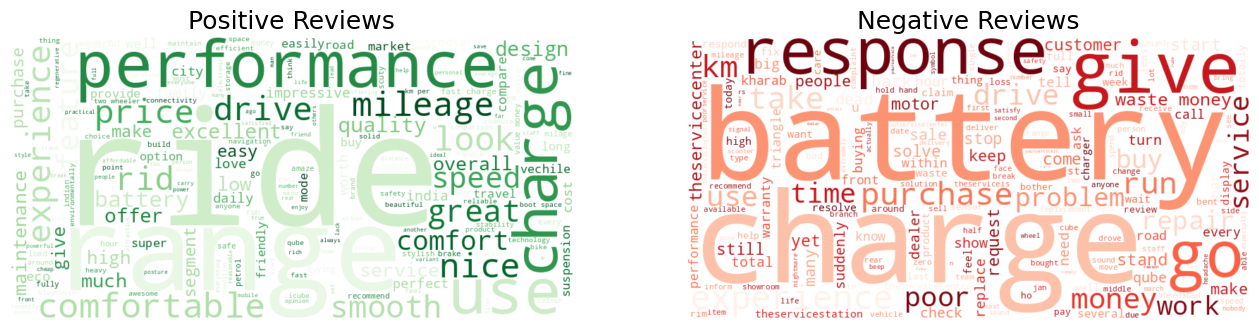

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


positive_texts = " ".join(df_subset[df_subset["sentiment"] == "positive"]["clean_review"].dropna().astype(str).tolist())
negative_texts = " ".join(df_subset[df_subset["sentiment"] == "negative"]["clean_review"].dropna().astype(str).tolist())

# Generate WordClouds
pos_wc = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_texts)
neg_wc = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_texts)

# Plot side by side
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(pos_wc, interpolation="bilinear")
plt.title("Positive Reviews", fontsize=18)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(neg_wc, interpolation="bilinear")
plt.title("Negative Reviews", fontsize=18)
plt.axis("off")

plt.show()


<div style="font-family: 'Segoe UI', Roboto, Helvetica, Arial, sans-serif; max-width:900px; margin:18px auto; line-height:1.6; color:#0f172a; padding:18px; background:#ffffff; border-radius:12px; box-shadow:0 6px 18px rgba(15,23,42,0.06);">
  
  <header style="margin-bottom:12px;">
    <h2 style="margin:0; font-size:22px; color:#0ea5a6;">Customer Sentiment Insights</h2>
    <p style="margin:6px 0 0; color:#475569;">Key observations from positive and negative reviews</p>
  </header>

  <section style="margin-top:14px;">
    <h3 style="margin:0 0 8px; font-size:18px; color:#059669;">Positive Reviews</h3>
    <p style="margin:0 0 10px; color:#334155;">
      Frequently observed words include:
    </p>
    <p style="margin:0 0 10px; font-family:monospace; background:#ecfdf5; padding:8px 12px; border-left:4px solid #34d399; border-radius:6px;">
      +Ride &nbsp;&nbsp; +Range &nbsp;&nbsp; +Smooth &nbsp;&nbsp; +Design &nbsp;&nbsp; +Comfortable <br>
      +Driving &nbsp;&nbsp; +Performance
    </p>
    <p style="margin:0 0 16px; color:#334155;">
      From these reviews, we can infer that customers appreciate the <strong>attractive design</strong>, <strong>comfortable seating</strong>, <strong>smooth ride quality</strong>, <strong>driving performance</strong>, and <strong>long driving range</strong>.
    </p>
  </section>

  <section style="margin-top:14px;">
    <h3 style="margin:0 0 8px; font-size:18px; color:#dc2626;">Negative Reviews</h3>
    <p style="margin:0 0 10px; color:#334155;">
      Frequently observed words include:
    </p>
    <p style="margin:0 0 10px; font-family:monospace; background:#fef2f2; padding:8px 12px; border-left:4px solid #f87171; border-radius:6px;">
      +Response &nbsp;&nbsp; +Service Centre &nbsp;&nbsp; +Performance &nbsp;&nbsp; +Money <br>
      +Battery &nbsp;&nbsp; +Charge
    </p>
    <p style="margin:0 0 16px; color:#334155;">
      The negatives highlight <strong>poor response from service centres</strong>, <strong>high service charges</strong>, and <strong>issues related to battery and charging</strong>.
    </p>
  </section>

</div>



Let us better understand the issues with charging and battery

In [ ]:
keywords = ['battery','charge','charging']
filtered_df = df_subset[(df_subset['sentiment']=='negative') & (df_subset['clean_review'].str.contains('|'.join(keywords),case=False,na=False))]


In [ ]:
len(filtered_df)

35

In [ ]:
pd.set_option('display.max_colwidth', None)
filtered_df[['review','dt']].head(3)

,review,dt
0,"Hello,I purchased tvs iqube in march 2021, it has run3000 kmfor 3 months and now there are many problems related to the speed, motor and several other problems. Full battery charging takes 6-7 hours, not satisfied by its performance, also still there are no properservicestations setup to solve the problems. Especially theservicestation at ramurthinagar, bangalore is very horrible. They don't even respond to our problems.",2021-09-30
3,Performance is very poor on this bike. The charging problem is a very big thing. Worth money. Don't spend the money on this bike. My bike is standing in theservicecenter of tvs iqube for a long time. I am very disappointed. Nobody can hear me because I purchased this bike. I want to sell this bike as soon as possible.,2022-09-30
4,"It's been 7 months since we are using this vehicle and the problem with charging has arisen. It's like charging 1% in one hour and we have complained about it 3 times but we are getting zero response from the company as well as theservicecenter. Theservicecenter kept our vehicle for 3 days n gave us as it is as they also don't know what's actually going on. Now, what should I do with this useless thing??",2023-09-30


From Inferring the above reviews, the charging problem can be seen as a major concern and service centre response. Most of the reviews are 2-3 years old when posting, let us filter and look at the latest reviews to find if such problems exists now.

In [ ]:
filtered_df[['dt']].describe()

,dt
count,34
mean,2024-05-08 21:52:56.470588160
min,2021-09-30 00:00:00
25%,2023-09-30 00:00:00
50%,2024-09-29 00:00:00
75%,2025-01-14 00:00:00
max,2025-09-08 00:00:00


In [ ]:
filtered_df[filtered_df['dt']>pd.to_datetime('2024-09-09')][['review','dt']].head(5)

,review,dt
34,I bought my TV iQube75 kmat 1 april 2025 with in 30 day battery dead almost 20 days pass no response from company nothing they do only500 kmi run even they have nopartsavailable in metro city like Ahmedabad tvs iqube is suddenly dead. Even I was at far they are given so many excuses for not giving roadside assistance I pul my vehicle myself for15 kmI am warning all who are going to buy tvs i q 100% sure you will regret buying the worst and a waste of money by theirservice,2025-06-02
37,"I bought this vehicle on 8.1.25 in Indore m.p. and on very next day vehicle after charging it, it was showing no response. It was just like dead and was showing no response on turning the key On.When complained to the company they replied we can make a complaint on your behalf and what the company will do we will let you know. It is the 5th day to day vehicle is with theservicecentre and no response. I am just thinking my money has gone to the wrong company that is giving a faulty product and then we need to go around theirservicejust after one day of purchase.Very disappointed by tvs and the after-sales response was too poor and felt cheated",2025-01-20
38,"Very bad scooter, many types of triangles are shown any time, and after20000 kmmay encounter mechanical problems 12 times, so nobody should buy this and don't suggest to anyone buy u can also use a petrol bike, no charging problem, you can use to safely. Very bad scooter, many types of triangles are shown any time, and after20000 kmmay encounter mechanical problems 12 times, so don't buy this.",2025-05-05
39,Rear Rim bent when bought within 6 months.The insurance company denies the claim they think this is a manufacturing fault or faulty tire design. After their rejection of the claim team TVs stand silent in front of the company surveyor. None of them helped the rear rim is just around 40000rs only excluding labor charges.Don't be apartof the TVS experiment friends go for a scooter that doesn't have a hub motor.Very upset.,2024-09-29
44,Please don't buy it. Worst riding andserviceexperience. Within a year lock was damaged 2 times and in turning and the speed breaker the vehicle gave an alert buzzing sound and the vehicle stopped running.Repaired about 10 times but the technician doesn't know how to repair changing software and sensor and charging for lock and sensor. But can't able to remove the alert.Above all side stand retract. The vehicle can stop running anywhere and restart doesn't work unless you again retract the side stand to start running horribly can get an accident anywhere with this system,2024-09-29


From inferring the above reviews we can see users complaint about wide range of problems from battery problems to rim repairs.

To get a better look let us move on clustering the reviews, to segment customers based on their feedbacks.

In [ ]:
%pip -q install bertopic

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import KeyBERTInspired
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
representation_model = KeyBERTInspired()

docs = df['clean_review_nl'].tolist()
topic_model = BERTopic(embedding_model=embedding_model,representation_model=representation_model)
topics, probs = topic_model.fit_transform(docs)


In [ ]:
pd.set_option('display.max_colwidth',50)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,91,-1_charging_service_charge_performance,"[charging, service, charge, performance, quali...",[low maintenance cost performance comfortable ...
1,0,87,0_poorservice_service_theservicecenter_theserv...,"[poorservice, service, theservicecenter, these...",[purchased qube st decision may battery go com...
2,1,86,1_service_maintenance_satisfied_reliable,"[service, maintenance, satisfied, reliable, qu...",[design decent nice performance mileage comfor...
3,2,29,2_charging_charge_kms_service,"[charging, charge, kms, service, performance, ...",[worth buying gives kmper charge comes drive e...
4,3,21,3_customers_customer_warranty_theservicecenter,"[customers, customer, warranty, theservicecent...",[buying experience chennai road price charging...


In [ ]:
modelled_df = pd.DataFrame({'topics':topics,'docs':docs})
modelled_df[modelled_df['topics']==0][['docs']]

,docs
47,price range stability drive awesome mileage km...
56,stability great mileage getting kmin eco mode ...
90,buying experience easy book unique yet go webs...
94,father bought since riding regularly power nic...
96,offers great value money smooth efficient perf...
...,...
308,delivering comfortable pleasant ride comes equ...
309,eco accommodating driving model offers dependa...
310,beyond exclusively connected fashionable excep...
311,showcases superior design quality featuring am...


In [ ]:
# Run the visualization with the original embeddings
topic_model.visualize_documents(docs, embeddings=embedding_model.encode(docs))

Clustering Results:

We can segment IQUBE Customers into 2 segments

Segment 1: People who complaint about quality issues with the model and poor service centre experience from the service centre. (Cluster to focus on) (Topic 0)

Segment 2: People who don't have product issues and have decent service experience and praise the model for low maintanence,good mileage. (Other Topics)



**Visualization**

In [ ]:

positive_review = df_subset[df_subset['sentiment'] == 'positive']
positive_review['temp_list'] = positive_review['clean_review'].apply(lambda x:str(x).split())


In [ ]:
from collections import Counter

top = Counter([item for sublist in positive_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,ride,24
1,charge,23
2,range,21
3,performance,21
4,use,20
5,comfortable,18
6,mileage,17
7,look,17
8,nice,17
9,price,16


In [ ]:
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Positive Sentiment Words')
fig.show()

In [ ]:
negative_review = df_subset[df_subset['sentiment'] == 'negative']
negative_review['temp_list'] = negative_review['clean_review'].apply(lambda x:str(x).split())

In [ ]:
from collections import Counter

top = Counter([item for sublist in negative_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,battery,28
1,charge,28
2,get,23
3,money,22
4,give,20
5,go,17
6,response,16
7,experience,15
8,purchase,14
9,take,14


In [ ]:
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Negative Sentiment Words')
fig.show()

In [ ]:
df_n_subset = df[df['hf_score']<0.6]

We will use overall rating for data with hf_score less than 0.6.

In [ ]:
positive_nsubset = df_n_subset[df_n_subset['overall_rating']>3]
negative_nsubset = df_n_subset[df_n_subset['overall_rating']<3]

In [ ]:
from collections import Counter
positive_nsubset['temp_list'] = positive_nsubset["clean_review"].apply(lambda x: x.split(" "))
top = Counter([item for sublist in positive_nsubset['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

In [ ]:
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Positive Words')
fig.show()

We see the same words being repeated as positive sentiment words.

In [ ]:
negative_nsubset['temp_list'] = negative_nsubset["clean_review"].apply(lambda x: x.split(" "))
top = Counter([item for sublist in negative_nsubset['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']

In [ ]:
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

Finally, let us compare the latest 1-year reviews vs. past reviews to analyze the customer sentiment and also to assess whether TVS have made significant improvement in the past 1 year.

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])

In [ ]:
import datetime
import datetime
import pandas as pd

df_latest = df[df['dt'] > pd.Timestamp(datetime.datetime.now() - datetime.timedelta(weeks=48))]
df_old = df[df['dt'] < pd.Timestamp(datetime.datetime.now() - datetime.timedelta(weeks=48))]

In [ ]:
len(df_latest)

149

In [ ]:
len(df_old)

165

In [ ]:
df_latest['overall_rating'].describe()

,overall_rating
count,149.000000
mean,3.861074
std,1.473170
min,1.000000
25%,3.000000
50%,4.500000
75%,5.000000
max,5.000000


In [ ]:
df_old['overall_rating'].describe()

,overall_rating
count,165.000000
mean,3.376364
std,1.504663
min,0.000000
25%,2.000000
50%,4.000000
75%,4.800000
max,5.000000


We can see good improvement in terms of overall rating

1) When comparing the mean of latest review's overall rating with old when can see an increase of 0.5.
2) Also the 25th quartile in old ratings is 2 when compared to the new which is 3.

Latest Reviews

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import KeyBERTInspired
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
representation_model = KeyBERTInspired()


docs = df_latest['clean_review_nl'].tolist()
topic_model = BERTopic(embedding_model=embedding_model,representation_model=representation_model)
topics, probs = topic_model.fit_transform(docs)


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,48,-1_repaired_scooters_theservicecenter_warranty,"[repaired, scooters, theservicecenter, warrant...",[since purchased daily riding km till working ...
1,0,45,0_problems_kms_complaint_service,"[problems, kms, complaint, service, petrol, wa...",[paid premium worse experience bought jan jamn...
2,1,42,1_service_charged_maintenance_buying,"[service, charged, maintenance, buying, scoote...",[wonderful riding smoothly make ride recently ...
3,2,14,2_problems_quality_speed_brands,"[problems, quality, speed, brands, brand, indu...",[great segment gives great range minus point f...


In [ ]:
topic_model.visualize_documents(docs,embeddings= embedding_model.encode(docs))

Cluster 1: Strong Negative Service and Product Problems.

Cluster 2: Strong positive experience.

Old Reviews

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import KeyBERTInspired
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
representation_model = KeyBERTInspired()

docs = df_old['clean_review_nl'].tolist()
topic_model = BERTopic(embedding_model=embedding_model,representation_model=representation_model)
topics, probs = topic_model.fit_transform(docs)


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14,-1_service_rate_quality_maintenance,"[service, rate, quality, maintenance, buying, ...",[like speed seeting plz purchase family member...
1,0,88,0_charge_charging_charger_problems,"[charge, charging, charger, problems, mileage,...",[much premature stage claim field conditions p...
2,1,63,1_service_poorservice_repair_theservicecenter,"[service, poorservice, repair, theservicecente...",[bought sep within week disappointed according...


In [ ]:
topic_model.visualize_documents(docs,embeddings=embedding_model.encode(docs))

In [ ]:

fig = px.bar(
    x=['Last 6 months', 'Earlier'],
    y=[df_latest['overall_rating'].mean(), df_old['overall_rating'].mean()],
    labels={'x': 'Review Date', 'y': 'Overall Rating'},  # axis labels
    title="Average Overall Rating by Review Date"
)

fig.show()


<div style="font-family: 'Segoe UI', Roboto, sans-serif; line-height:1.6; max-width:850px; margin:0 auto; padding:16px; background:#ffffff; border-radius:10px; box-shadow:0 4px 12px rgba(0,0,0,0.05);">
  
  <h2 style="margin-top:0; font-size:22px; color:#0f172a;">Suggestions & Strategy</h2>
  
  <ol style="margin:0; padding-left:20px; color:#1e293b;">
    <li style="margin-bottom:8px;">
      <strong>Enhance Product Quality</strong> — Prioritize improvements in <em>battery performance and reliability</em> to address one of the most common customer concerns.
    </li>
    <li style="margin-bottom:8px;">
      <strong>Strengthen Service Experience</strong> — Provide in-depth training for service technicians to better understand EV systems. Focus on <em>clear and empathetic communication</em> with customers when explaining service issues and solutions.
    </li>
    <li style="margin-bottom:8px;">
      <strong>Optimize Service Costs</strong> — Reduce overall maintenance and service charges, making ownership more affordable and attractive to family-segment buyers.
    </li>
  </ol>
  
  <p style="margin-top:14px; color:#475569; font-size:15px;">
    Implementing these strategies will enable <strong>TVS</strong> to improve the overall customer experience, strengthen brand loyalty, and ultimately drive higher sales.
  </p>
</div>



<h4> Ather Rizta </h4>

In [ ]:
import pandas as pd

df = pd.read_csv("ather_rizta_final.csv")
df.drop_duplicates(subset=['review_text'], inplace=True)


In [ ]:
len(df)

48

In [ ]:
df = df.rename(columns={"review_text":"review"})

In [ ]:
df.tail(3)

,date,reviewer_id,review,overall_rating,range_reported
45,2024-11-27,46,Good nice ather Rizta 1.23 km\r\nLow priz onl...,5.0,NaN
46,2024-11-25,47,On the road experienced...... flying in the sk...,5.0,NaN
47,2024-11-21,48,i tried a test drive in ather showroom and fee...,4.2,NaN


<h4> Exploratory Data Analysis </h4>

<Axes: xlabel='overall_rating', ylabel='Count'>

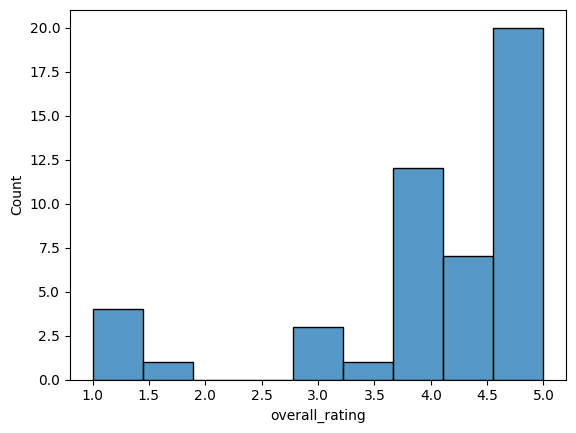

In [ ]:
import seaborn as sn
sn.histplot(data=df,x='overall_rating')

According to overall rating we can see high no of positive reviews compared to negative reviews.

In [ ]:
df['overall_rating'].describe()

,overall_rating
count,48.000000
mean,4.054167
std,1.157760
min,1.000000
25%,4.000000
50%,4.350000
75%,4.850000
max,5.000000


Atleast 75% of the users rate rizta greater than or equal to 4.

In [ ]:
temp_df= df.copy()
temp_df.dropna(subset ='range_reported',inplace=True)

In [ ]:
temp_df['range_reported_t'] = temp_df['range_reported'].astype(str).apply(lambda x: int(x.split(' ')[0]))

Text(0.5, 0, 'Range Reported')

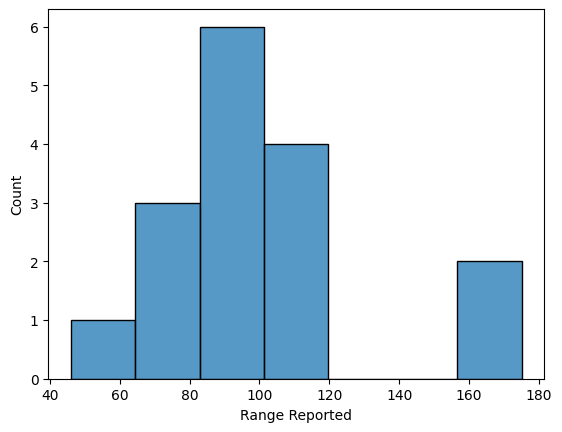

In [ ]:
import matplotlib.pyplot as plt
sn.histplot(data=temp_df,x='range_reported_t')
plt.xlabel('Range Reported')

In [ ]:
temp_df[temp_df['range_reported_t']>150]

,date,reviewer_id,review,overall_rating,range_reported,range_reported_t
5,2024-10-03,6,BuyingExperience: The buyingexperiencewas seam...,4.0,169 km/charge,169
14,2025-09-26,15,It has good looks and also goodperformance.It ...,4.0,175 km/charge,175


We doubt the range provided by the users, so we disregard their reported range and proceed to analyze the sentiment.

In [ ]:
pd.set_option('display.max_colwidth',None)
temp_df[temp_df['range_reported_t']<50][['review']]

,review
0,"Everyone has been giving rave reviews about the Ather Rizta. I purchased my scooter about 4 months ago. Unfortunately, it has been a pretty badexperienceto date. First point the vehicles to bulky and heavy and very difficult to move. People sitting in the back constantly complain about how wide the vehicle is and how difficult it is to get on the vehicle and get down from the vehicle.Once youridethis vehicle you suddenly realize that your thighs and leg are paining a lot.The condition according to the company itself is you cannot have more than 140 kgsridingon the vehicle, which means that you and your wife together cannot weigh more than 140 kgs.;The mileage is extremely poor.Have been to service three times in the last 4 months and there has been no improvement. The mileage that I have been getting is in the range of 40 to 50 km for a full charge.I waited for over 1 year trying to get the perfect electric vehicle and I was convinced with all the publicity that this was the vehicle of choice for me. I am sorry to say that this vehicle is anything but good and I would strongly advise anyone to buy this vehicle."


In [ ]:
temp_df[temp_df['range_reported_t']<150]['range_reported_t'].describe()

,range_reported_t
count,14.000000
mean,88.928571
std,17.869029
min,46.000000
25%,81.750000
50%,90.000000
75%,103.750000
max,110.000000


From the above data pattern, we can observe than on average rizta users get range over 80 km.

Review Posting Date Range

In [ ]:
df[['date']].describe()

,date
count,48
mean,2025-03-30 02:00:00
min,2024-10-03 00:00:00
25%,2024-12-25 06:00:00
50%,2025-04-05 00:00:00
75%,2025-06-26 00:00:00
max,2025-09-26 00:00:00


<h4> Sentiment Analysis </h4>

In [ ]:
from transformers import pipeline

sent = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def hf_label(text):
    out = sent(text[:512])[0]
    return out['label'], out['score']

df[['hf_label', 'hf_score']] = df['review'].apply(lambda t: pd.Series(hf_label(t)))


In [ ]:
df[['review','hf_label','hf_score']].tail(2)

,review,hf_label,hf_score
46,"On the road experienced...... flying in the sky with Rizta.\r\nThis is the fourth ather.....we own\r\n\r\nAll are exceptionally good, Rizta...the best",5 stars,0.871636
47,i tried a test drive in ather showroom and feel discomfort and the foot rest is so bad and propack is also a headache,1 star,0.553125


In [ ]:
custom_stopwords = {"ather","rizta","get","best","good","worst","said","bad","one","even","also", "bike", "scooter", "ev","electric","vehicle","scooty","day","days","time","months","month","problem","company","hai","please","never","buy","dont","issue","issues","year","years"}
df["clean_review"] = df["review"].astype(str).apply(lambda x: preprocess_text(x,custom_stopwords))


In [ ]:
df['sentiment'] = df['hf_label'].apply(lambda x: int(x.split(" ")[0]))
df['sentiment'] = df['sentiment'].apply(
    lambda x: 'negative' if x < 3 else ('neutral' if x == 3 else 'positive')
)

In [ ]:
print(f"negative rating {len(df[df['sentiment']=='negative'])}")
print(f"positive rating {len(df[df['sentiment']=='positive'])}")
print(f"neutral rating {len(df[df['sentiment']=='neutral'])}")

negative rating 10
positive rating 33
neutral rating 5


Since we have a smaller amount of data, we will analyze the entire dataset regardless of the hf score.

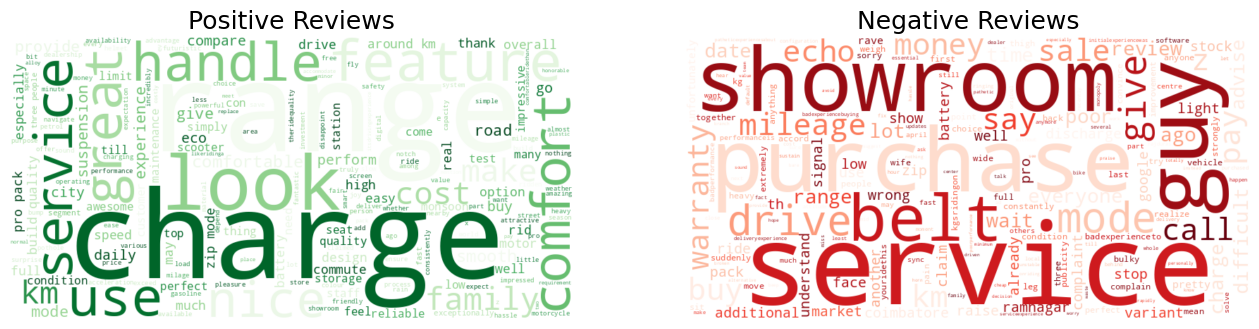

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


positive_texts = " ".join(df[df["sentiment"] == "positive"]["clean_review"].dropna().astype(str).tolist())
negative_texts = " ".join(df[df["sentiment"] == "negative"]["clean_review"].dropna().astype(str).tolist())

# Generate WordClouds
pos_wc = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_texts)
neg_wc = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_texts)

# Plot side by side
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(pos_wc, interpolation="bilinear")
plt.title("Positive Reviews", fontsize=18)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(neg_wc, interpolation="bilinear")
plt.title("Negative Reviews", fontsize=18)
plt.axis("off")

plt.show()


<div style="font-family: 'Segoe UI', Roboto, Helvetica, Arial, sans-serif; max-width:900px; margin:18px auto; line-height:1.6; color:#0f172a; padding:18px; background:#ffffff; border-radius:12px; box-shadow:0 6px 18px rgba(15,23,42,0.06);">
  
  <header style="margin-bottom:12px;">
    <h2 style="margin:0; font-size:22px; color:#0ea5a6;">Ather Rizta – Customer Sentiment Insights</h2>
    <p style="margin:6px 0 0; color:#475569;">Highlights from positive and negative reviews</p>
  </header>

  <section style="margin-top:14px;">
    <h3 style="margin:0 0 8px; font-size:18px; color:#059669;">Positive Reviews</h3>
    <p style="margin:0 0 10px; color:#334155;">
      Frequently observed words include:
    </p>
    <p style="margin:0 0 10px; font-family:monospace; background:#ecfdf5; padding:8px 12px; border-left:4px solid #34d399; border-radius:6px;">
      +Look &nbsp;&nbsp; +Range &nbsp;&nbsp; +Charge &nbsp;&nbsp; +Comfort &nbsp;&nbsp; +Smooth
    </p>
    <p style="margin:0 0 16px; color:#334155;">
      From these reviews, we can infer that customers value the <strong>stylish design</strong>, <strong>good driving range</strong>, <strong>charging convenience</strong>, <strong>comfort</strong>, and <strong>smooth ride experience</strong>.
    </p>
  </section>

  <section style="margin-top:14px;">
    <h3 style="margin:0 0 8px; font-size:18px; color:#dc2626;">Negative Reviews</h3>
    <p style="margin:0 0 10px; color:#334155;">
      Frequently observed words include:
    </p>
    <p style="margin:0 0 10px; font-family:monospace; background:#fef2f2; padding:8px 12px; border-left:4px solid #f87171; border-radius:6px;">
      +Service &nbsp;&nbsp; +Showroom &nbsp;&nbsp; +Mileage &nbsp;&nbsp; +Warranty
    </p>
    <p style="margin:0 0 16px; color:#334155;">
      The negatives point towards issues with <strong>service centres</strong>, <strong>showroom experiences</strong>, <strong>lower-than-expected mileage</strong>, and <strong>warranty concerns</strong>.
    </p>
  </section>

</div>



Let us analyze the negative reviews to understand better

In [ ]:
pd.set_option('display.max_colwidth', None)
df[df['sentiment']=='negative']['review'].tail(8)

,review
3,"I recently bought an Ather Rizta Mid variant with a pro pack (pro pack is essential for the 5-year (additional 2 years from original 3 years) warranty they claim on ads and costs you close to 20k). I have also bought an additional 3 years battery warranty for 5k.Let me talk about the deliveryexperience, I have purchased the vehicle through a local dealer (rajdurai's Coimbatore, Ramnagar). The initialexperiencewas good until I paid the whole money, till then the sales guy was behind me every day ringing at least 5-6 times asking if I can make it the next day. The moment I paid I stopped getting calls from the sales guy, in fact, the guy was missing during delivery and I (myself and my family) had to wait for an 1 hour without any updates, not sure about if this happens in other showrooms. Sales guys show a lot of attitude is what I understand from the reviews on Google for the showroom, Ather should fix this to sustain in the market, they should understand that they are not a monopoly anymore, there are several electric bikes in the market with 8 years default warranty with better configurations. I also hear patheticexperiencesabout the service especially on the Coimbatore, Ramnagar branch. I am already worried about my wrong purchase decision, hope not to get any issues in between to avoid the pathetic service team and the hassle."
6,Very poorperformance. Very low range. Unstable onriding.poor service. Horn not working. A beeping sound with a signal light is not provided. Signal light and scooter stop themselves. No value for money. Nothing to praise the scooter. Discharge rapidly if you are not using it. See another alternative instead of this one.Don't buy it.
7,"Very Bad, never buy, Belt driven scooter,My Rizta Z has only driven 1891 KM and the belt is broken, and the belt is not in stock with the service center. They are saying we don't know when we will get the belt in stock, very very Bad serviceexperience, totally a waste of money, personally, I suggest buying any cheap variant, in EV"
21,"Bare minimum features like regenerative breaking, decent driving modes needs to pay ~15k per month. This is ignoring google maps and navigation. Their inability to integrate"
28,"I purchased highest model ""Z SUPER MATTE-3.7 KwH"". I ride it 8 month ups. Ather & Arai giving wrong information about Mileage. they say 160km/1 time charge. when in reality Rizta"
36,"I purchased this new scooter from shree sai taj energy Ca road nagpur two months ago, now scooter is not starting and not even showing on display completely blank, Showroom owner"
42,Very low performance on echo mode. We have to ride it on Zip drive only. Useless use of echo mode. We have another ev iqube it is very good on echo as well as on zip mode
47,i tried a test drive in ather showroom and feel discomfort and the foot rest is so bad and propack is also a headache


We can see the customers face problems with vehicle related to belt, performance, display going blank etc.

<h4> Clustering </h4>

In [ ]:
%pip -q install bertopic

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
# Load a custom embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

stop_words = set(stopwords.words("english"))
custom_stopwords_1 = {"ather","rizta","ev","scooter","scooty","electric","scooters","evs","years","bike","bikes","vehicle"}
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words=list(stop_words.union(custom_stopwords_1)),min_df= 2, ngram_range=(1, 3))

docs = df['review'].tolist()

topic_model = BERTopic(embedding_model=embedding_model,representation_model = KeyBERTInspired(),vectorizer_model = vectorizer_model)
topics, probs = topic_model.fit_transform(docs)



In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,11,-1_ride_fast charging station_riding_also fast...,"[ride, fast charging station, riding, also fas...",[This E bike give good km mileage in one charg...
1,0,20,0_ride_driven_commute_mileage,"[ride, driven, commute, mileage, suspension, b...",[I was finally bought this Rizta Z 3.7kw with ...
2,1,17,1_city commute_mileage_cost_features like,"[city commute, mileage, cost, features like, b...",[Very good family scooter good staff and a pra...


In [ ]:
topic_model.visualize_documents(docs,embeddings=embedding_model.encode(docs))

Results:

We can again segment customers into two categories

1. Customers who have good experience with the product. (All topics)

2. Customers who complaint about various product related problems and service centre experience. (Reviews which are assigned to postive topics and reviews which are not assigned with any topic.)

Let us understand more about service and maintenance

In [ ]:
service_df = df[df['clean_review'].str.contains("|".join(['service','maintenance']),case=False,regex=True)]
len(service_df)

12

In [ ]:
service_df['overall_rating'].describe()

,overall_rating
count,12.000000
mean,3.216667
std,1.729862
min,1.000000
25%,1.000000
50%,4.000000
75%,4.800000
max,5.000000


<Axes: xlabel='overall_rating', ylabel='Count'>

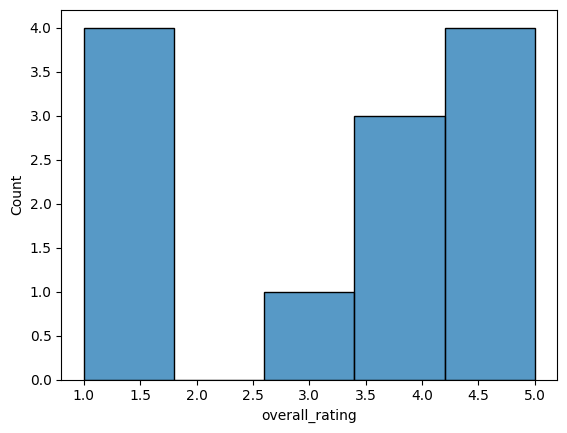

In [ ]:
sn.histplot(data=service_df,x='overall_rating')

In [ ]:
pd.set_option('display.max_colwidth',None)
service_df[service_df['overall_rating']>3][['review']].tail(3)

,review
22,Very good vehicle and very good response from company and very much comfortable for a family person good range also. And very good looking. Service center are near by and many
35,Wonderful service by ather \r\nAlready provided Fast charging station in nearby area \r\nThanks ather to build this kind of ev scooter.\r\nVery suitable for Indian family and built
45,Good nice ather Rizta 1.23 km\r\nLow priz only 1.44 lac\r\nCharging hub \r\nBest service good quality\r\nNice look \r\nOther ev schoter better than ather


In [ ]:
pd.set_option('display.max_colwidth',None)
service_df[service_df['overall_rating']<3][['review']].tail(3)

,review
2,"Performanceis not good very fast discharge battery. Services is too much because I claimed parts on date 12th April 2025 but the service centre called me on 6th may 2025. And Scooty 's software is giving very badperformance, this is not sync, I already raised a complaint but ather company still now not solved the issue nor have they called me about the raised complaint. I advise to everyone not to buy the Ather Scooty, i am facing the problem, I don't want to face others.Very badexperiencebuying Ather Rizta Z Scooty."
6,Very poorperformance. Very low range. Unstable onriding.poor service. Horn not working. A beeping sound with a signal light is not provided. Signal light and scooter stop themselves. No value for money. Nothing to praise the scooter. Discharge rapidly if you are not using it. See another alternative instead of this one.Don't buy it.
7,"Very Bad, never buy, Belt driven scooter,My Rizta Z has only driven 1891 KM and the belt is broken, and the belt is not in stock with the service center. They are saying we don't know when we will get the belt in stock, very very Bad serviceexperience, totally a waste of money, personally, I suggest buying any cheap variant, in EV"


Again we can see that the service support is not satisfactory as we can see equal no of negative and positive reviews.  

Other problems

Mileage

As we saw earlier the average range is over 80 km, but some customers complain about range issues, let us dig deeper to understand about this problem.

In [ ]:
keywords = ["range","mileage"]
mileage_df = df[df['clean_review'].str.contains("|".join(keywords),case=False,regex=True)].copy()

In [ ]:
mileage_df.groupby(['sentiment'])['sentiment'].value_counts()

,count
sentiment,
negative,3
neutral,3
positive,14


Overall, people have good opinion about the range. These negative reviews may be influenced due to product problems and unrealistic expectation of real world range.

Visualizations

In [ ]:
positive_review = df[df['sentiment'] == 'positive']
positive_review['temp_list'] = positive_review['clean_review'].apply(lambda x:str(x).split())
from collections import Counter

top = Counter([item for sublist in positive_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Positive Sentiment Words')
fig.show()

In [ ]:
negative_review = df[df['sentiment'] == 'negative']
negative_review['temp_list'] = negative_review['clean_review'].apply(lambda x:str(x).split())

from collections import Counter

top = Counter([item for sublist in negative_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Negative Sentiment Words')
fig.show()

<div style="font-family: 'Segoe UI', Roboto, sans-serif; line-height:1.6; max-width:850px; margin:0 auto; padding:16px; background:#ffffff; border-radius:10px; box-shadow:0 4px 12px rgba(0,0,0,0.05);">
  
  <h2 style="margin-top:0; font-size:22px; color:#0f172a;">Conclusion — Ather Rizta</h2>
  
  <p style="color:#1e293b; margin-bottom:10px;">
    Unlike the <strong>TVS iQube</strong>, customers generally do not raise major concerns regarding <em>battery performance</em>.
    However, recurring issues are observed in other areas:
  </p>
  
  <h3 style="font-size:18px; margin-bottom:6px; color:#0f172a;">Key Issues</h3>
  <ol style="color:#1e293b; margin:0 0 12px 20px;">
    <li>Service center experience</li>
    <li>Minor product-related problems</li>
    <li>Unrealistic expectations about range</li>
    <li>Lack of proper understanding about driving modes</li>
  </ol>
  
  <h3 style="font-size:18px; margin-bottom:6px; color:#0f172a;">Suggestions</h3>
  <ol style="color:#1e293b; margin:0 0 12px 20px;">
    <li>Provide clear communication about the <strong>different driving modes</strong> and their impact on performance.</li>
    <li>Set <strong>realistic range expectations</strong> for consumers based on real-world conditions.</li>
    <li>Enhance the <strong>after-sales service experience</strong> through better technician training and improved customer support.</li>
  </ol>
  
  <p style="margin-top:14px; color:#475569; font-size:15px;">
    By addressing these aspects, Ather can strengthen customer trust and satisfaction, ensuring long-term adoption in the competitive EV market.
  </p>
</div>

**Ola S1**

In [ ]:
import pandas as pd

df = pd.read_csv("ola_s1x_final.csv")
df.drop_duplicates(subset='review_text',inplace=True)
len(df)

103

In [ ]:
df.rename(columns = {'review_text':'review'},inplace=True)

Exploratory Data Analysis

<Axes: xlabel='overall_rating', ylabel='Count'>

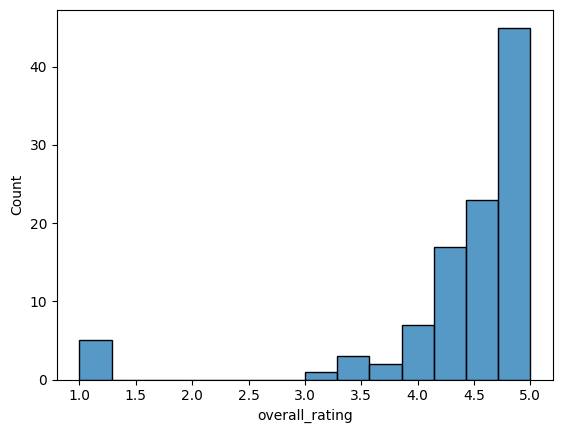

In [ ]:
import seaborn as sn
sn.histplot(data = df,x='overall_rating')

We can see high positive reviews for this model

In [ ]:
df[['overall_rating']].describe()

,overall_rating
count,103.000000
mean,4.432039
std,0.889064
min,1.000000
25%,4.300000
50%,4.700000
75%,5.000000
max,5.000000


In [ ]:
temp_df = df.copy()

temp_df.dropna(subset='range_reported',inplace=True)
temp_df['range_reported_t'] = temp_df['range_reported'].apply(lambda x: int(x.split(' ')[0]))

Text(0.5, 0, 'Range Reported')

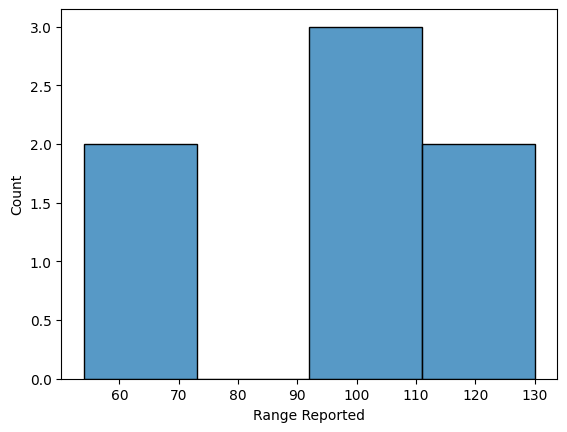

In [ ]:
import matplotlib.pyplot as plt

sn.histplot(data=temp_df[temp_df['range_reported_t']<150],x='range_reported_t')

plt.xlabel("Range Reported")

In [ ]:
pd.set_option('display.max_colwidth',None)
temp_df[temp_df['range_reported_t']>200][['review','date']]

,review,date
10,"Please don't buy, I have just ignored the reviews on social media, and trusted on the brand name, Ola, but now it is becoming miserable for me, worst after salesservice, no direct contact details, if you are lucky then you will get the chance to talk with the vvips of Ola employees, since one month my bike is atservicecentre and they are continuously testing, totally fade up, pl don't buy or refer any one.",2025-09-09


The review looks geniune and lets not drop this data. We will ignore the range reported by the user.

Based on different variants under ola s1x we can see range variation.

Review Posting Date

In [ ]:
df[['date']].describe()

,date
count,103
mean,2025-06-03 15:50:40.776699136
min,2025-02-05 00:00:00
25%,2025-04-14 00:00:00
50%,2025-06-03 00:00:00
75%,2025-07-21 12:00:00
max,2025-09-23 00:00:00


<h4> Sentiment Analysis </h4>

In [ ]:
from transformers import pipeline

sent = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def hf_label(text):
    out = sent(text[:512])[0]
    return out['label'], out['score']

df[['hf_label', 'hf_score']] = df['review'].apply(lambda t: pd.Series(hf_label(t)))


In [ ]:
df[['review','hf_label','hf_score']].head(2)

,review,hf_label,hf_score
0,These scooter specifications and range are top...,3 stars,0.393321
1,"Not buy ola product,servicehighly issue. One's...",1 star,0.960940


In [ ]:
custom_stopwords = {"ola","poor","bike","bhe","h","lelo","aur","padte","bhi","s1x","x","best","good","worst","said","bad","one","even","also", "bike", "product","bahut","scooter", "ev","electric","vehicle","scooty","day","days","time","months","month","problem","company","hai","please","never","buy","dont","issue","issues","year","years"}
df['clean_review'] = df['review'].apply(lambda x: preprocess_text(x,custom_stopwords))

In [ ]:
df['hf_rating'] = df['hf_label'].apply(lambda x: int(x.split(' ')[0]))
df['sentiment'] = df['hf_rating'].apply(
    lambda x: 'negative' if x < 3 else ('neutral' if x == 3 else 'positive')
)

In [ ]:
df_subset = df[df['hf_score']>=0.6]

In [ ]:
print(f"negative rating {len(df_subset[df_subset['sentiment']=='negative'])}")
print(f"positive rating {len(df_subset[df_subset['sentiment']=='positive'])}")
print(f"neutral rating {len(df_subset[df_subset['sentiment']=='neutral'])}")

negative rating 4
positive rating 56
neutral rating 2


Since we have a smaller amount of data, we will analyze the entire dataset regardless of the hf score.

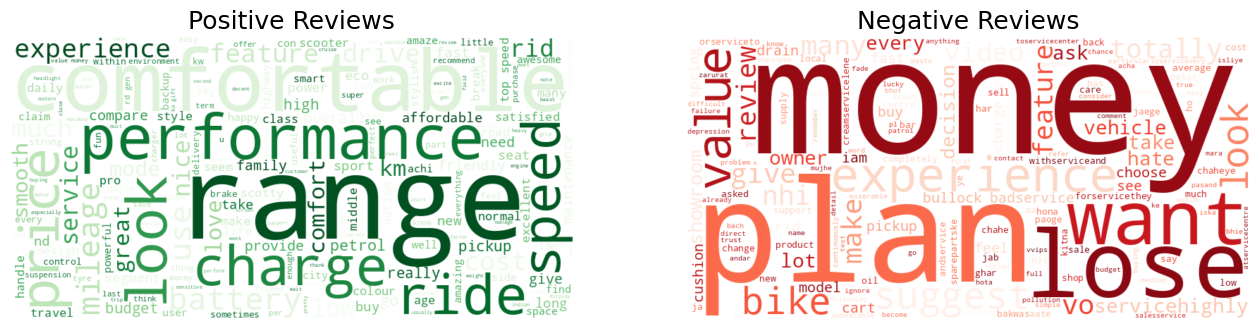

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


positive_texts = " ".join(df[df["sentiment"] =='positive']["clean_review"].dropna().astype(str).tolist())
negative_texts = " ".join(df[df["sentiment"] =='negative']["clean_review"].dropna().astype(str).tolist())

# Generate WordClouds
pos_wc = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_texts)
neg_wc = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_texts)

# Plot side by side
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(pos_wc, interpolation="bilinear")
plt.title("Positive Reviews", fontsize=18)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(neg_wc, interpolation="bilinear")
plt.title("Negative Reviews", fontsize=18)
plt.axis("off")

plt.show()

<div style="font-family: 'Segoe UI', Roboto, sans-serif; line-height:1.6; max-width:850px; margin:0 auto; padding:16px; background:#ffffff; border-radius:10px; box-shadow:0 4px 12px rgba(0,0,0,0.05);">
  
  <h2 style="margin-top:0; font-size:22px; color:#0f172a;">Ola S1X — Sentiment Summary</h2>
  
  <h3 style="font-size:18px; margin-bottom:6px; color:#0f172a;">Positive Aspects</h3>
  <ul style="color:#1e293b; margin:0 0 12px 20px;">
    <li>Performance</li>
    <li>Range</li>
    <li>Look & Design</li>
    <li>Comfort</li>
    <li>Battery</li>
    <li>Driving Experience</li>
  </ul>
  
  <h3 style="font-size:18px; margin-bottom:6px; color:#0f172a;">Negative Aspects</h3>
  <ul style="color:#1e293b; margin:0 0 12px 20px;">
    <li>Service Center Issues</li>
    <li>Poor Customer Experience</li>
  </ul>
  
  <p style="margin-top:14px; color:#475569; font-size:15px;">
    Beyond these service-related concerns, few other consistent negative themes were observed.
    To gain deeper insights into the <strong>underlying topics</strong> discussed in reviews,
    we now move forward to <strong>Topic Modeling</strong> to cluster and analyze user feedback.
  </p>
</div>

In [ ]:
%pip -q install bertopic

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
# Load a custom embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

stop_words = set(stopwords.words("english"))
custom_stopwords_1 = {"ola","s1","x","scooter","bike","ev","evs","vehicle","electric","scooty"}
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words=list(stop_words.union(custom_stopwords_1)),min_df= 2, ngram_range=(1, 3))

docs = df['review'].tolist()

topic_model = BERTopic(embedding_model=embedding_model,representation_model = KeyBERTInspired(),vectorizer_model = vectorizer_model)
topics, probs = topic_model.fit_transform(docs)



In [ ]:
pd.set_option('display.max_colwidth',50)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,41,-1_affordable_good mileage_ride_mileage,"[affordable, good mileage, ride, mileage, vehi...",[Engine performance is good.Great mileage per ...
1,0,35,0_mileage best_comfortable ride_ride_good mileage,"[mileage best, comfortable ride, ride, good mi...",[It's a really good scooter i ever see. It's l...
2,1,27,1_comfortable ride_top speed_mileage_performance,"[comfortable ride, top speed, mileage, perform...","[Ola S1 x is very good electric scooty, nice m..."


In [ ]:
topic_model.visualize_documents(docs,embeddings = embedding_model.encode(docs))

Wow as of the latest extracted data, we find consumers not complaining much about the model. We need more data from various other platforms to get unbiased view of the model. But for now, this looks great for Ola.

Finally let us check service and maintenance section.

In [ ]:
service_df = df[df['review'].str.contains("|".join(["service","maintenance"]),case=False,regex=True)].head()

In [ ]:
len(service_df)

5

In [ ]:
service_df['overall_rating'].mean()

np.float64(3.0)

In [ ]:
pd.set_option('display.max_colwidth',None)
service_df[['review']]

,review
0,These scooter specifications and range are top-notch. But Ola need to improve theirserviceand reducemaintenancecost. Ola also need to reveal information about battery safety about extreme temperature survival test. Impact test. Ola need to rebuild its own trust among customers because many times Customers suffer from takingservicesandmaintenance
1,"Not buy ola product,servicehighly issue. One's you buy this you have lost money, I have lost my money and time, hate this product. NEVER EVER BUY OLA PRODUCT. Every showroom has lot of vehicles. If you want to buy Ola product before you ask 3 vehicle owners after take a Decision."
2,"Badservice, no pickup , bad experience with ola . Not value for money . Been 1 year since I bought it not at all good . I'd suggest you to not buy it . Fast charge draining . Model look is also not good . Some what feels like iam riding on a Bullock cart . No springs under the bike for cushion. You can buy other bikes if you want I don't suggest ola . See other bikes and choose . I gave a scooty forservicethey gave it back after 14 days too bad withserviceand they didn't completely make it good. When asked about it they are saying to change the oil at local bike shops."
4,"It's very simple procedure for buying the scooter, affordable price also, needservicein every5000 km, comfortable and smooth riding position and engine work, am happy as a customer. The features included are top class, as a rider it's very funny and as a family man I can manage my expenses what I early meet for my old petrol scooter. Thank you Ola!!!"
5,"Scooter is very good in travelling, very good in average.. serviceis the worstpartof the ola company. it must be good in compare to the current time.Scooter is always stuck when it's raining.Both sensor are not working when there is raining in your area and this is the worstpartof my journey from when get Ola S1x."


<h4> Visualization </h4>

In [ ]:
positive_review = df[df['sentiment'] == 'positive']
positive_review['temp_list'] = positive_review['clean_review'].apply(lambda x:str(x).split())
from collections import Counter

top = Counter([item for sublist in positive_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']

import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Positive Sentiment Words')
fig.show()

In [ ]:
negative_review = df[df['sentiment'] == 'negative']
negative_review['temp_list'] = negative_review['clean_review'].apply(lambda x:str(x).split())

top = Counter([item for sublist in negative_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Negative Sentiment Words')
fig.show()

<div style="font-family: 'Segoe UI', Roboto, sans-serif; line-height:1.6; max-width:850px; margin:0 auto; padding:16px; background:#ffffff; border-radius:10px; box-shadow:0 4px 12px rgba(0,0,0,0.05);">
  
  <h2 style="margin-top:0; font-size:22px; color:#0f172a;">Final Suggestions — Ola S1X</h2>
  
  <p style="color:#1e293b; margin-bottom:10px;">
    The latest customer reviews highlight notable improvements in the <strong>Ola S1X</strong> model:
  </p>
  <ul style="color:#1e293b; margin:0 0 12px 20px;">
    <li><strong>Positive:</strong> Customers appreciate the <em>range</em> and <em>performance</em>, which contribute strongly to positive reviews.</li>
    <li><strong>Negative:</strong> Despite improvements, <em>service center issues</em> remain a recurring theme in customer feedback. These concerns are often mentioned even within otherwise positive reviews.</li>
  </ul>
  
  <h3 style="margin-top:12px; font-size:18px; color:#0f172a;">Recommendations</h3>
  <ol style="margin:0; padding-left:20px; color:#1e293b;">
    <li style="margin-bottom:8px;">
      <strong>Maintain Product Momentum</strong> — Continue refining <em>range</em> and <em>performance</em> to sustain positive customer sentiment.
    </li>
    <li style="margin-bottom:8px;">
      <strong>Resolve Service Center Issues</strong> — Invest in <em>after-sales support infrastructure</em>, technician training, and customer communication to align service quality with product quality.
    </li>
  </ol>
  
  <p style="margin-top:14px; color:#475569; font-size:15px;">
    While Ola’s recent improvements have earned strong positive sentiment, addressing service-related concerns is essential to ensure long-term customer satisfaction and brand loyalty.
  </p>
</div>



<h4> Bajaj Chetak </h4>

In [ ]:
import pandas as pd

#Custom dataset from web scrapping
df = pd.read_csv("chetak_final.csv")
df.drop_duplicates(subset='review_text',inplace=True)
len(df)

167

In [ ]:
df.rename(columns = {'review_text':'review'},inplace=True)

<h4> Exploratory Data Analysis </h4>

In [ ]:
df['overall_rating'].describe()

,overall_rating
count,164.000000
mean,3.532317
std,1.650616
min,1.000000
25%,1.000000
50%,4.300000
75%,5.000000
max,5.000000


In [ ]:
df[pd.isna(df['overall_rating'])]

,Unnamed: 0,date,overall_rating,review,range_reported
5,5,2025-07-30,NaN,"I bought Chetak before 3.5 years ago, now the ...",NaN
54,54,2025-07-30,NaN,I have bought one month before a new Bajaj Che...,NaN
56,56,2025-01-15,NaN,Excellent Features as well as style also ridin...,138.0


<Axes: xlabel='overall_rating', ylabel='Count'>

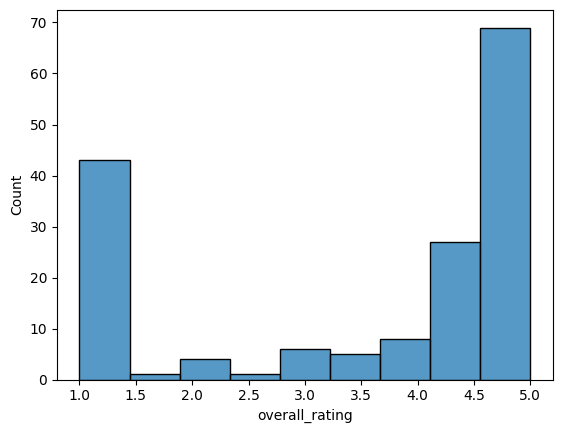

In [ ]:
import seaborn as sn
sn.histplot(data = df,x='overall_rating')

We can see strong positive and negative feedback from the users.

<Axes: xlabel='range_reported_t', ylabel='Count'>

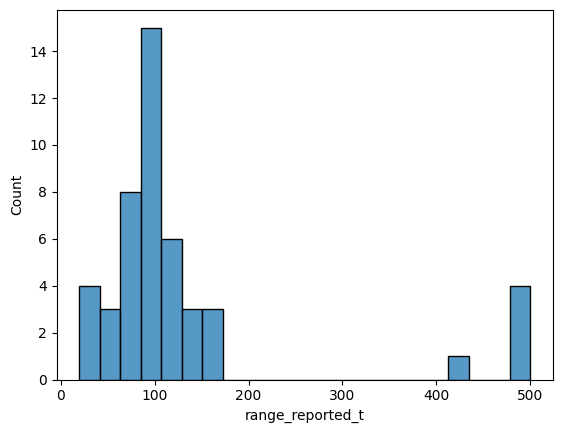

In [ ]:
temp_df = df.copy()

temp_df.dropna(subset='range_reported',inplace=True)
temp_df['range_reported_t'] = temp_df['range_reported'].apply(lambda x: int(x.split(' ')[0]))
sn.histplot(data=temp_df,x='range_reported_t')

The IDC claimed range for the Chetak is 153, but we can see some people reporting a range above 130, which is not practically possible. Let us check if these are outliers.

In [ ]:
temp_df[temp_df['range_reported_t']>130].head(5)

,Unnamed: 0,date,overall_rating,review,range_reported,range_reported_t
16,16,2025-08-27,1.0,It is very sad to admit that the very poorserv...,500 km/charge,500
29,29,2025-04-09,1.0,Worst vehicle i purchased vehicle on 3month ag...,500 km/charge,500
31,31,2025-01-15,5.0,Good and value for money and reliable product ...,140 km/charge,140
41,41,2025-01-15,1.0,In 4 months the vehicle broke down twice sudde...,484 km/charge,484
50,50,2025-05-21,5.0,"Very useful in daily life, convenient for dail...",153 km/charge,153


We can again ignore the range claimed and focus on reviews as it feels genuine and the range reported may be misstyped.

In [ ]:
temp_df[temp_df['range_reported_t']<130]['range_reported_t'].mean()

np.float64(84.47222222222223)

In [ ]:
pd.set_option('display.max_colwidth',None)
temp_df[temp_df['range_reported_t']<50]

,Unnamed: 0,date,overall_rating,review,range_reported,range_reported_t
18,18,2025-02-12,3.0,"My firstservicewas skipped due to 'my bike run1700 kmand taken money 550/- instead of 350/-.Money does not matter but my firstservicewas skeped .and staff behavior was not good also.In my bike small battery discharged very soon but didn't change, The staff said that pay 1000 and after that new battery came in 10/15 days after that we changed.",40 km/charge,40
27,27,2025-09-03,1.0,"While its TecPac and mobile app are disasters, its battery and BMS are faulty. Within 3 3-month range has reduced to30kmonly. Theservicecenter says it's normal if I speed up more than40 km/h. If I run at max 40kmph, it may give a range of80kms. I drive16kmevery day at a speed of up to 70kmph, and the battery goes down by 50%, the range reduces to62 kmfrom133 km. That means you can't drive in Sports mode ever, or else the battery will drop within 10 minutes. I paid 1.70 lakh, including Rs. 7500.00 on TecPac. The company is not responding to repeated complaints. I am cheated.",20 km/charge,20
48,48,2025-08-13,1.0,"I bought this scooter three months ago. The company had an IDC range of153 kmsbut initially I got only100 kmsper charge but suddenly it reduced to50kmsper charge. I didn't expect this from a reputable company that drives only3000kms.. really feel worried.. When I went to theservicecentre, they did not respond properly.",40 km/charge,40
51,51,2025-07-09,1.0,"Don't buy it as theservicesare pathetic, and you need to wait for at least 15-20 days. Battery performance reduces within 3 months. RSA is not picking calls, and if you connect, you need to wait for an hour to register a complaint, and adding to it will come in 1-3 hours after that.",40 km/charge,40


Again we can see the reviews look geniune, so as of range we can expect range of over 70 and in worst case the range can go down to 40km.

In [ ]:
temp_df[(temp_df['range_reported_t']>=40) & (temp_df['range_reported_t']<130)]['range_reported_t'].describe()

,range_reported_t
count,35.000000
mean,86.314286
std,22.336690
min,40.000000
25%,74.000000
50%,89.000000
75%,100.000000
max,122.000000


Text(0.5, 0, 'Range Reported')

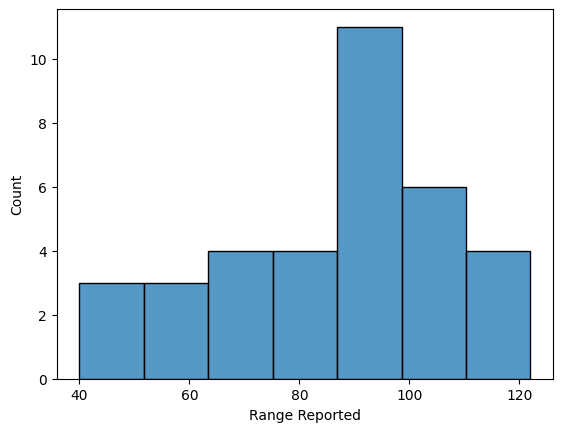

In [ ]:
import matplotlib.pyplot as plt
sn.histplot(data = temp_df[(temp_df['range_reported_t']>=40) & (temp_df['range_reported_t']<130)],x = 'range_reported_t')
plt.xlabel("Range Reported")

So we can expect a range of 70 and above

Review Posting Date

In [ ]:
df[['date']].describe()

,date
count,165
mean,2025-05-19 22:06:32.727272704
min,2024-12-21 00:00:00
25%,2025-03-26 00:00:00
50%,2025-05-25 00:00:00
75%,2025-07-29 00:00:00
max,2025-09-28 00:00:00


We have only latest reviews about this model.

Sentiment Analysis

In [ ]:
from transformers import pipeline

sent = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def hf_label(text):
    out = sent(text[:512])[0]
    return out['label'], out['score']

df[['hf_label', 'hf_score']] = df['review'].apply(lambda t: pd.Series(hf_label(t)))

In [ ]:
df[['review','hf_label','hf_score']].head(2)


,review,hf_label,hf_score
0,Onboard Charger stopped working within 04 months of purchase. My Chetak 2433/Premium 2024 is lying in the Jeypore Showroom since December 2024 for the replacement of the defective Onboard Charger. Theservicecentre or the Chetak Customer Support System could not resolve my problem even after 03 months. Please be aware of these frauds. The after-salesserviceexperience is very pathetic. Please don’t invest 1.6 Lakhs on these types of fraudulentservices.If u have any doubts about my review I can show the bills.,1 star,0.869824
1,Don't buy Bajaj Chetak electricI have been using the vehicle for 3.2 yearsVery much problemsOne buy one problem They were charging a very much amount for theservicesplease don't buy so you will lose moneyThey are asking 20k plus money forservicingcostIt's humble request don't buy this productThank you,1 star,0.931017


In [ ]:
custom_stopwords = {"bajaj","best","good","worst","said","bad","one","even","chetak","also", "bike", "scooter", "ev","electric","vehicle","scooty","day","days","time","months","month","problem","company","hai","please","never","buy","dont","issue","issues","year","years"}
df["clean_review"] = df["review"].astype(str).apply(lambda x: preprocess_text(x,custom_stopwords))
custom_stopwords_1 = {"bajaj","said","one","even","chetak","also", "bike", "scooter", "ev","electric","vehicle","scooty","day","days","time","months","month","company","year","years"}
df["clean_review_nl"] = df["review"].astype(str).apply(lambda x: preprocess_text_withoutlematize(x,custom_stopwords))

In [ ]:
df['hf_rating'] = df['hf_label'].apply(lambda x: int(x.split(' ')[0]))
df['sentiment'] = df['hf_rating'].apply(
    lambda x: 'negative' if x < 3 else ('neutral' if x == 3 else 'positive')
)

In [ ]:
df_subset = df[df['hf_score']>=0.6]

In [ ]:
len(df_subset)

103

In [ ]:
print(f"negative rating {len(df_subset[df_subset['sentiment']=='negative'])}")
print(f"positive rating {len(df_subset[df_subset['sentiment']=='positive'])}")
print(f"neutral rating {len(df_subset[df_subset['sentiment']=='neutral'])}")

negative rating 44
positive rating 58
neutral rating 1


Since we have a smaller amount of data, we will analyze the entire dataset regardless of the hf score.

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

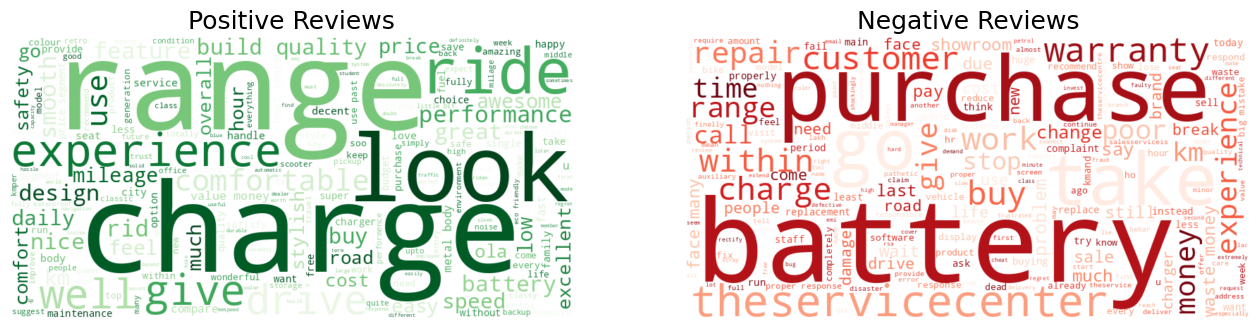

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


positive_texts = " ".join(df[df["sentiment"] =='positive']["clean_review"].dropna().astype(str).tolist())
negative_texts = " ".join(df[df["sentiment"] =='negative']["clean_review"].dropna().astype(str).tolist())

# Generate WordClouds
pos_wc = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_texts)
neg_wc = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_texts)

# Plot side by side
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(pos_wc, interpolation="bilinear")
plt.title("Positive Reviews", fontsize=18)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(neg_wc, interpolation="bilinear")
plt.title("Negative Reviews", fontsize=18)
plt.axis("off")

<div style="font-family: 'Segoe UI', Roboto, sans-serif; line-height:1.6; max-width:850px; margin:0 auto; padding:16px; background:#ffffff; border-radius:10px; box-shadow:0 4px 12px rgba(0,0,0,0.05);">
  
  <h2 style="margin-top:0; font-size:22px; color:#0f172a;">Bajaj Chetak — Sentiment Summary</h2>
  
  <h3 style="font-size:18px; margin-bottom:6px; color:#0f172a;">Positive Aspects</h3>
  <ul style="color:#1e293b; margin:0 0 12px 20px;">
    <li>Design & Build Quality</li>
    <li>Smooth Ride Experience</li>
    <li>Comfortable Seating</li>
    <li>Good Performance</li>
    <li>Decent Range & Charging Efficiency</li>
  </ul>
  
  <h3 style="font-size:18px; margin-bottom:6px; color:#0f172a;">Negative Aspects</h3>
  <ul style="color:#1e293b; margin:0 0 12px 20px;">
    <li>Battery Issues & Charging Problems</li>
    <li>Poor Service Center Experience</li>
    <li>High Maintenance or Repair Costs</li>
    <li>Inconsistent Range Feedback</li>
  </ul>
  
  <p style="margin-top:14px; color:#475569; font-size:15px;">
    Overall, Bajaj Chetak receives appreciation for its <strong>premium build quality, design, and comfort</strong>,
    but faces <strong>criticism regarding battery reliability and after-sales service</strong>.
    To gain a clearer understanding of user pain points and discussion patterns, we proceed to
    <strong>Topic Modeling</strong> to cluster and analyze customer feedback in greater detail.
  </p>
</div>


<h4> Clustering </h4>

In [ ]:
%pip -q install bertopic

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

# Load a custom embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
representation_model = KeyBERTInspired()
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words=list(custom_stopwords_1),min_df= 2, ngram_range=(1, 3))

docs = df['review'].tolist()
topic_model = BERTopic(embedding_model=embedding_model,representation_model=representation_model,vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(docs)

In [ ]:
pd.set_option('display.max_colwidth', 50)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,114,0_charging_charge_battery_buying,"[charging, charge, battery, buying, will, cost...",[Good and value for money and reliable product...
1,1,53,1_warranty_the warranty_battery is_battery,"[warranty, the warranty, battery is, battery, ...",[Theserviceat the Nagpur Iride showroom is ver...


In [ ]:

topic_model.visualize_documents(docs,embeddings=embedding_model.encode(docs))

On one side we have customers who praise Chetak for its performance and decent service. But on the other side, the same story continues: we see people complaining about vehicle breakdowns, battery, charger, and OS problems, and also the service center response is the worst.

<h4> Visualization </h4>

In [ ]:
positive_review = df[df['sentiment'] == 'positive']
positive_review['temp_list'] = positive_review['clean_review'].apply(lambda x:str(x).split())
from collections import Counter

top = Counter([item for sublist in positive_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']

import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Positive Sentiment Words')
fig.show()

In [ ]:
negative_review = df[df['sentiment'] == 'negative']
negative_review['temp_list'] = negative_review['clean_review'].apply(lambda x:str(x).split())

from collections import Counter

top = Counter([item for sublist in negative_review['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Negative Sentiment Words')
fig.show()

<div style="font-family: 'Segoe UI', Roboto, sans-serif; line-height:1.6; max-width:850px; margin:0 auto; padding:16px; background:#ffffff; border-radius:10px; box-shadow:0 4px 12px rgba(0,0,0,0.05);">
  
  <h2 style="margin-top:0; font-size:22px; color:#0f172a;">Final Suggestions — Bajaj Chetak</h2>
  
  <p style="color:#1e293b; margin-bottom:10px;">
    Customer reviews for <strong>Bajaj Chetak</strong> show a mixed sentiment:
  </p>
  <ul style="color:#1e293b; margin:0 0 12px 20px;">
    <li><strong>Positive:</strong> Appreciated for its <em>stylish looks</em> and <em>solid performance</em>.</li>
    <li><strong>Negative:</strong> Frequent complaints about <em>battery issues</em>, <em>charger problems</em>, <em>OS glitches</em>, and <em>service center experiences</em>, leading to strong negative sentiment.</li>
  </ul>
  
  <h3 style="margin-top:12px; font-size:18px; color:#0f172a;">Recommendations</h3>
  <ol style="margin:0; padding-left:20px; color:#1e293b;">
    <li style="margin-bottom:8px;">
      <strong>Improve Product Quality</strong> — Pay special attention to <em>battery performance</em> and <em>operating system stability</em>.
    </li>
    <li style="margin-bottom:8px;">
      <strong>Strengthen After-Sales Service</strong> — Enhance service center reliability and focus on <em>customer-first communication</em> to build trust and improve customer satisfaction.
    </li>
  </ol>
  
  <p style="margin-top:14px; color:#475569; font-size:15px;">
    By addressing these areas, Bajaj can improve customer satisfaction, reduce negative reviews, and increase sales through <em>positive word-of-mouth</em>.
  </p>
</div>



**Final Thoughts :**

Currently, EVs hold a market share of around 6-7% of total two wheeler sales in India, which shows strong adoption. However, for the industry to move further ahead, companies need to focus on improving product reliability and after-sales support.

Key areas of improvement include:

1) Training staff to handle product issues more effectively.

2) Enhancing after-sales experience, especially addressing service center concerns.

Better communication during sales, where salespersons should clearly explain:

1) Real-world range expectations.

2) Driving modes and their impact on performance and battery life.

3) Transparent details about model specifications.

If EV companies work on these critical areas, we can expect electric vehicles to capture an even larger market share than petrol vehicles in the near future.

Thank you!!!

Your Feedback is welcomed!!